In [2]:
from io import StringIO
import os

import boto3
import pandas as pd
import matplotlib as mb
import numpy as np

pd.set_option("display.max_columns", 50)

### Create AWS key variables

In [3]:
aws_access_key_id = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRET_KEY")

### Create function for reading csv file from a S3 bucket

In [4]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
  """Downloads a csv file from a S3 bucket.
  
  Parameters
  ----------
  bucket: str
    The bucket where the files are.
    
  path: str
    The folders to the file.
  
  filename: str
    Name of the file.
    
  Returns
  --------
  pd.DataFrame
    A DataFrame of the downloaded file.
  """
  s3 = boto3.client("s3", aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_key)

  full_path = f"{path}{filename}"
  
  object = s3.get_object(Bucket=bucket, Key=full_path)
  object = object["Body"].read().decode("utf-8")
  output_df = pd.read_csv(StringIO(object))
  
  return output_df

### Prepare the folders

In [5]:
s3 = boto3.client("s3", aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_key)
bucket = "cubix-chicago-taxi-akt"

payment_type_path = "transformed_data/payment_type/"
community_areas_path = "transformed_data/community_areas/"
company_path = "transformed_data/company/"
date_path = "transformed_data/date/"
taxi_trips_path = "transformed_data/taxi_trips/"
weather_path = "transformed_data/weather/"


### Read files

In [ ]:
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename="payment_type_master.csv")
community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, filename="community_areas_master.csv")
company = read_csv_from_s3(bucket=bucket, path=company_path, filename="company_master.csv")
date = read_csv_from_s3(bucket=bucket, path=date_path, filename="date_dimension.csv")

In [52]:
payment_type.head()

,payment_type_id,payment_type
0,1,Mobile
1,2,Cash
2,3,Credit Card
3,4,Prcard
4,5,No Charge


In [7]:
community_areas.head()

,area code,community_name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


In [8]:
company.head()

,company_id,company
0,1,5 Star Taxi
1,2,Sun Taxi
2,3,Taxicab Insurance Agency Llc
3,4,Choice Taxi Association Inc
4,5,Flash Cab


In [9]:
date.head()

,date,year,month,day,dayofweek,isweekend
0,2023-01-01,2023,1,1,7,True
1,2023-01-02,2023,1,2,1,False
2,2023-01-03,2023,1,3,2,False
3,2023-01-04,2023,1,4,3,False
4,2023-01-05,2023,1,5,4,False


In [10]:
trips_list = []
weather_list = []

In [11]:
for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
  taxi_trips_key = file["Key"]

  if taxi_trips_key.split("/")[-1].strip() !="":
    if taxi_trips_key.split(".")[1] == "csv":
      
      filename = taxi_trips_key.split("/")[-1] 
      trip = read_csv_from_s3(bucket, taxi_trips_path, filename)
      trips_list.append(trip)
      print(f"{filename} has been added.")
  

taxi_2024-06-18.csv has been added.
taxi_2024-06-19.csv has been added.
taxi_2024-06-20.csv has been added.
taxi_2024-06-21.csv has been added.
taxi_2024-06-22.csv has been added.
taxi_2024-06-23.csv has been added.
taxi_2024-06-24.csv has been added.
taxi_2024-06-25.csv has been added.


In [12]:
trips = pd.concat(trips_list, ignore_index=True)

In [13]:
trips.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_community_area_id,datetime_for_weather,payment_type_id,company_id
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,8,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,8,2024-06-18 23:00:00,3,5
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,7,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,6,2024-06-18 23:00:00,1,5
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,76,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,5,2024-06-18 23:00:00,3,12
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,32,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,8,2024-06-18 23:00:00,1,3
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,76,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,22,2024-06-18 23:00:00,3,3


In [14]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148065 entries, 0 to 148064
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     148065 non-null  object 
 1   taxi_id                     148065 non-null  object 
 2   trip_start_timestamp        148065 non-null  object 
 3   trip_end_timestamp          148065 non-null  object 
 4   trip_seconds                148065 non-null  int64  
 5   trip_miles                  148065 non-null  float64
 6   pickup_community_area_id    148065 non-null  int64  
 7   fare                        148065 non-null  float64
 8   tips                        148065 non-null  float64
 9   tolls                       148065 non-null  float64
 10  extras                      148065 non-null  float64
 11  trip_total                  148065 non-null  float64
 12  pickup_centroid_latitude    148065 non-null  float64
 13  pickup_centroi

In [15]:
trips.shape

(148065, 20)

In [16]:
for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)["Contents"]:
    weather_key = file["Key"]

    if weather_key.split("/")[-1].strip() !="":
        if weather_key.split(".")[1] == "csv":
        
            filename = weather_key.split("/")[-1]
            weather_daily = read_csv_from_s3(bucket, weather_path, filename)
            weather_list.append(weather_daily)

            print(f"{filename} has been added.")    

weather_2024-06-18.csv has been added.
weather_2024-06-19.csv has been added.
weather_2024-06-20.csv has been added.
weather_2024-06-21.csv has been added.
weather_2024-06-22.csv has been added.
weather_2024-06-23.csv has been added.
weather_2024-06-24.csv has been added.
weather_2024-06-25.csv has been added.


In [17]:
weather = pd.concat(weather_list, ignore_index=True)

In [18]:
weather.head()

,datetime,temperature,wind_speed,rain,precipitation
0,2024-06-18 00:00:00,33.0,24.2,0.0,0.0
1,2024-06-18 01:00:00,29.0,22.0,0.0,0.0
2,2024-06-18 02:00:00,28.1,23.8,0.0,0.0
3,2024-06-18 03:00:00,27.2,22.3,0.0,0.0
4,2024-06-18 04:00:00,27.1,19.6,0.0,0.0


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       192 non-null    object 
 1   temperature    192 non-null    float64
 2   wind_speed     192 non-null    float64
 3   rain           192 non-null    float64
 4   precipitation  192 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB


In [20]:
weather.shape

(192, 5)

### Join them together

In [21]:
trips_full = pd.merge(trips, weather, left_on ="datetime_for_weather", right_on="datetime", how="inner")
trips_full = trips_full.drop(columns=["datetime"])
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_community_area_id,datetime_for_weather,payment_type_id,company_id,temperature,wind_speed,rain,precipitation
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,8,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,8,2024-06-18 23:00:00,3,5,31.8,30.6,0.0,0.0
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,7,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,6,2024-06-18 23:00:00,1,5,31.8,30.6,0.0,0.0
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,76,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,5,2024-06-18 23:00:00,3,12,31.8,30.6,0.0,0.0
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,32,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,8,2024-06-18 23:00:00,1,3,31.8,30.6,0.0,0.0
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,76,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,22,2024-06-18 23:00:00,3,3,31.8,30.6,0.0,0.0


In [22]:
trips_full = pd.merge(trips_full, company, left_on="company_id", right_on="company_id", how="inner")
trips_full = trips_full.drop(columns=["company_id"])
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_community_area_id,datetime_for_weather,payment_type_id,temperature,wind_speed,rain,precipitation,company
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,8,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,8,2024-06-18 23:00:00,3,31.8,30.6,0.0,0.0,Flash Cab
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,7,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,6,2024-06-18 23:00:00,1,31.8,30.6,0.0,0.0,Flash Cab
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,76,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,5,2024-06-18 23:00:00,3,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,32,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,8,2024-06-18 23:00:00,1,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,76,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,22,2024-06-18 23:00:00,3,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc


In [23]:
trips_full = pd.merge(trips_full, payment_type, left_on="payment_type_id", right_on="payment_type_id", how="inner")
trips_full = trips_full.drop(columns=["payment_type_id"])
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_community_area_id,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,8,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,8,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,7,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,6,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,76,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,5,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,32,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,8,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,76,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,22,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card


In [24]:
trips_full = pd.merge(trips_full, community_areas, left_on="pickup_community_area_id", right_on="area code", how="inner")
trips_full = trips_full.drop(columns=["pickup_community_area_id", "area code"])
trips_full.rename(columns={"community_name": "pickup_community_area_name"}, inplace=True)
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_community_area_id,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,8,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card,Near North Side
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,6,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile,Lincoln Park
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,5,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card,O'Hare
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,8,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,Loop
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,22,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare


In [25]:
trips_full = pd.merge(trips_full, community_areas, left_on="dropoff_community_area_id", right_on="area code", how="inner")
trips_full = trips_full.drop(columns=["dropoff_community_area_id", "area code"])
trips_full.rename(columns={"community_name": "dropoff_community_area_name"}, inplace=True)
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card,Near North Side,Near North Side
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile,Lincoln Park,Lake View
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card,O'Hare,North Center
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,Loop,Near North Side
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Logan Square


In [26]:
# trips_full.info()
# date.info()
# trip_start_timestamp and date are objects

In [27]:
trips_full.head()

# 2024-06-18T23:45:00.000
# 2024-06-18

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,342,1.12,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card,Near North Side,Near North Side
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,777,3.03,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile,Lincoln Park,Lake View
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18T23:45:00.000,2024-06-19T00:15:00.000,1570,14.43,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card,O'Hare,North Center
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18T23:45:00.000,2024-06-18T23:45:00.000,599,1.94,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,Loop,Near North Side
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18T23:45:00.000,2024-06-19T00:00:00.000,991,14.28,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Logan Square


In [28]:
date['date'] = pd.to_datetime(date['date'])

In [29]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1827 non-null   datetime64[ns]
 1   year       1827 non-null   int64         
 2   month      1827 non-null   int64         
 3   day        1827 non-null   int64         
 4   dayofweek  1827 non-null   int64         
 5   isweekend  1827 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(4)
memory usage: 73.3 KB


In [30]:
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])
trips_full['trip_start_date'] = trips_full['trip_start_timestamp'].dt.date # DATE(column)
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])


In [31]:
trips_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147974 entries, 0 to 147973
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_id                      147974 non-null  object        
 1   taxi_id                      147974 non-null  object        
 2   trip_start_timestamp         147974 non-null  datetime64[ns]
 3   trip_end_timestamp           147974 non-null  object        
 4   trip_seconds                 147974 non-null  int64         
 5   trip_miles                   147974 non-null  float64       
 6   fare                         147974 non-null  float64       
 7   tips                         147974 non-null  float64       
 8   tolls                        147974 non-null  float64       
 9   extras                       147974 non-null  float64       
 10  trip_total                   147974 non-null  float64       
 11  pickup_centroid_latitude  

In [32]:
trips_full['trip_start_date'].dtypes

dtype('<M8[ns]')

In [33]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18 23:45:00,2024-06-18T23:45:00.000,342,1.12,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card,Near North Side,Near North Side,2024-06-18
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18 23:45:00,2024-06-19T00:00:00.000,777,3.03,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile,Lincoln Park,Lake View,2024-06-18
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18 23:45:00,2024-06-19T00:15:00.000,1570,14.43,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card,O'Hare,North Center,2024-06-18
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18 23:45:00,2024-06-18T23:45:00.000,599,1.94,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,Loop,Near North Side,2024-06-18
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18 23:45:00,2024-06-19T00:00:00.000,991,14.28,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Logan Square,2024-06-18


In [34]:
trips_full = pd.merge(trips_full, date, left_on="trip_start_date", right_on="date", how="inner")
trips_full = trips_full.drop(columns=["date"])
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date,year,month,day,dayofweek,isweekend
0,498213267d9d8a5b9c55149a1eb8531bd8e8336b,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2024-06-18 23:45:00,2024-06-18T23:45:00.000,342,1.12,6.25,1.00,0.0,0.0,7.75,41.899602,-87.633308,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Credit Card,Near North Side,Near North Side,2024-06-18,2024,6,18,2,False
1,48dbfe8f9c735bbfdce7e35028b45876b9f48469,da1a4de231c9fa53f23463812544aa4af3c4de1cfc4add...,2024-06-18 23:45:00,2024-06-19T00:00:00.000,777,3.03,11.46,3.00,0.0,0.0,14.46,41.922686,-87.649489,41.944227,-87.655998,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Flash Cab,Mobile,Lincoln Park,Lake View,2024-06-18,2024,6,18,2,False
2,439725470678efb2014c7f93d434d37930c64fe8,8e61957eda2e69d68b0bce4add726e0a84827e3f1ec9c9...,2024-06-18 23:45:00,2024-06-19T00:15:00.000,1570,14.43,36.50,6.15,0.0,4.0,47.15,41.980264,-87.913625,41.947792,-87.683835,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Blue Ribbon Taxi Association,Credit Card,O'Hare,North Center,2024-06-18,2024,6,18,2,False
3,4172db2de157874279cc72156d98ab811a94afd6,cfaf3ec1344ffc1a207c1cbe3b1a89ab060081a60450d1...,2024-06-18 23:45:00,2024-06-18T23:45:00.000,599,1.94,9.00,2.34,0.0,0.0,11.34,41.878866,-87.625192,41.899602,-87.633308,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,Loop,Near North Side,2024-06-18,2024,6,18,2,False
4,3fc0b7810f5a097fc79413e0733e704069a33b82,aee6a1f2577e5f670e300733aca9b27ad8fecd22425d14...,2024-06-18 23:45:00,2024-06-19T00:00:00.000,991,14.28,49.00,6.00,0.0,0.0,55.50,41.980264,-87.913625,41.922761,-87.699155,2024-06-18 23:00:00,31.8,30.6,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Logan Square,2024-06-18,2024,6,18,2,False


### Data visualizations

<Axes: xlabel='company'>

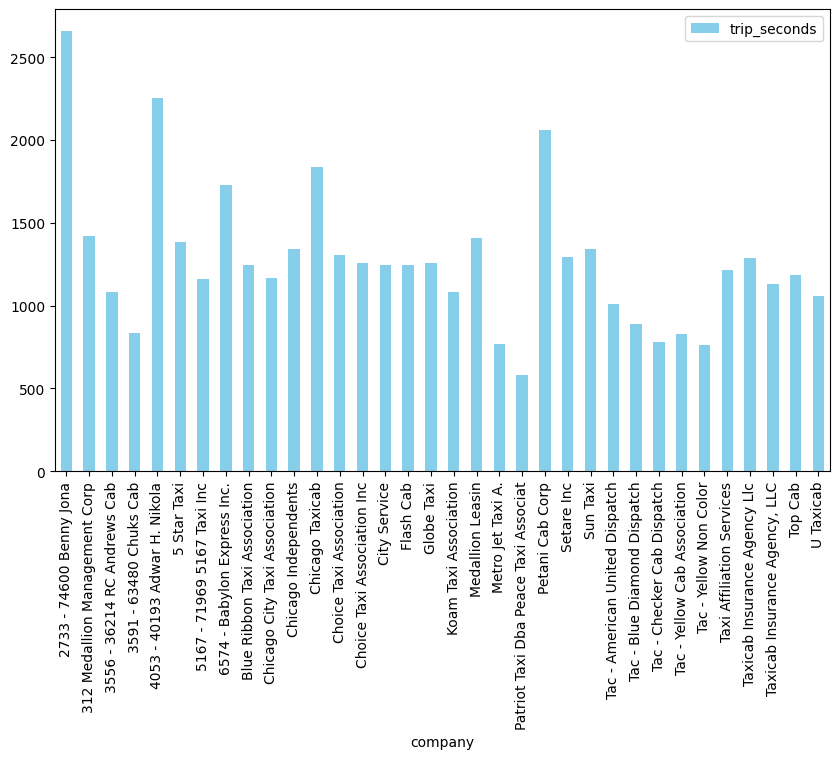

In [57]:
pivot_tripseconds_company = trips_full.pivot_table(values='trip_seconds', index='company', aggfunc='mean')
pivot_tripseconds_company.plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='company'>

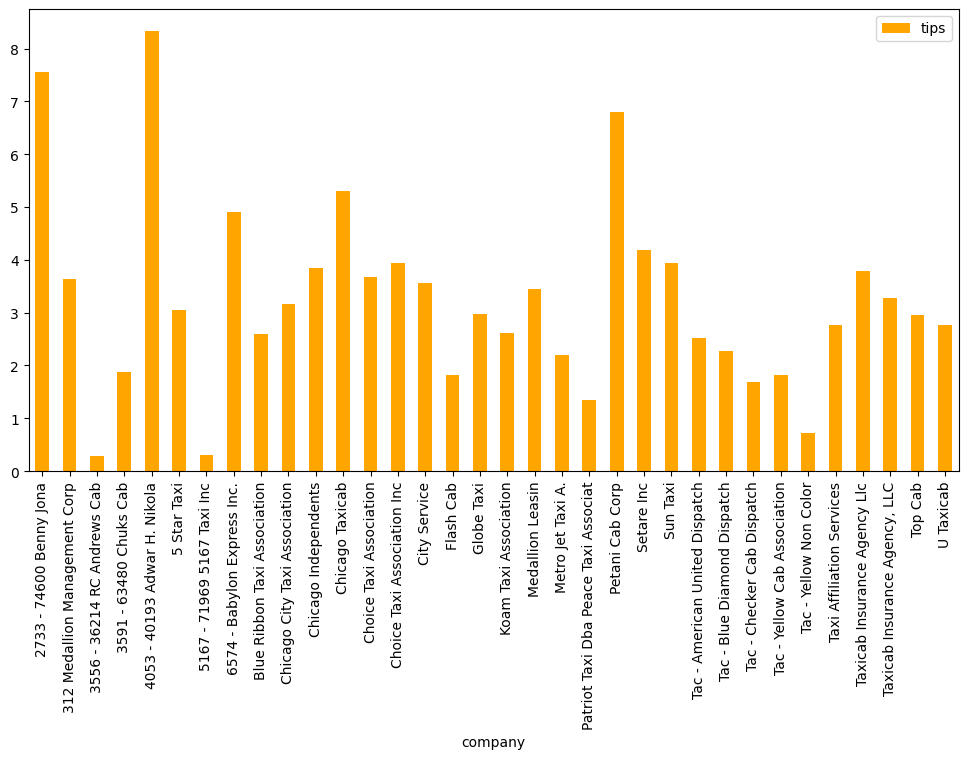

In [40]:
pivot_tips_by_company = trips_full.pivot_table(values='tips', index='company', aggfunc='mean')
pivot_tips_by_company.plot(kind='bar', figsize=(12, 6), color='orange')

<Axes: xlabel='dayofweek'>

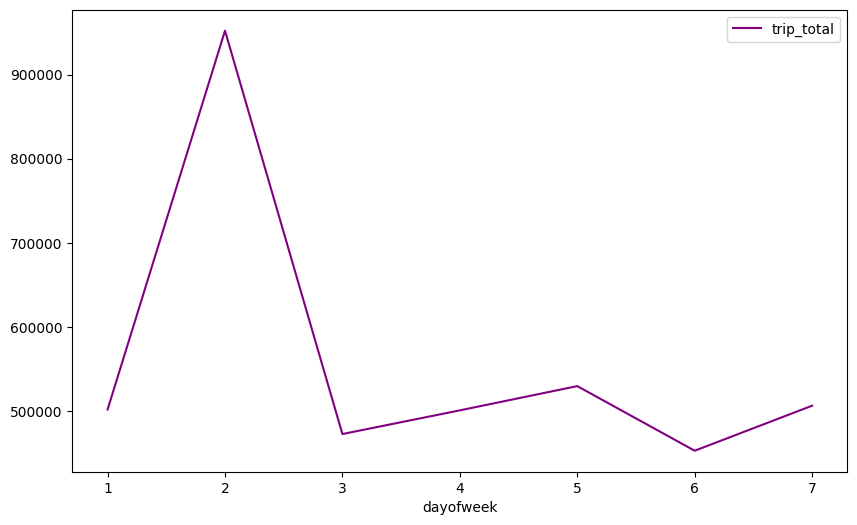

In [42]:
pivot_trips_by_dayofweek = trips_full.pivot_table(values='trip_total', index='dayofweek', aggfunc='sum')
pivot_trips_by_dayofweek.plot(kind='line', figsize=(10, 6), color='purple')

<Axes: xlabel='isweekend'>

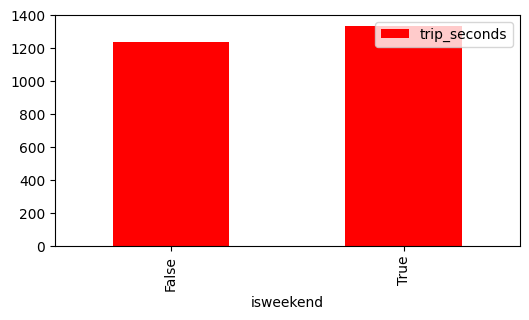

In [59]:
pivot_tripduration_by_workday_or_not = trips_full.pivot_table(values='trip_seconds', index='isweekend', aggfunc='mean')
pivot_tripduration_by_workday_or_not.plot(kind='bar', figsize=(6, 3), color='red')

<Axes: xlabel='pickup_community_area_name'>

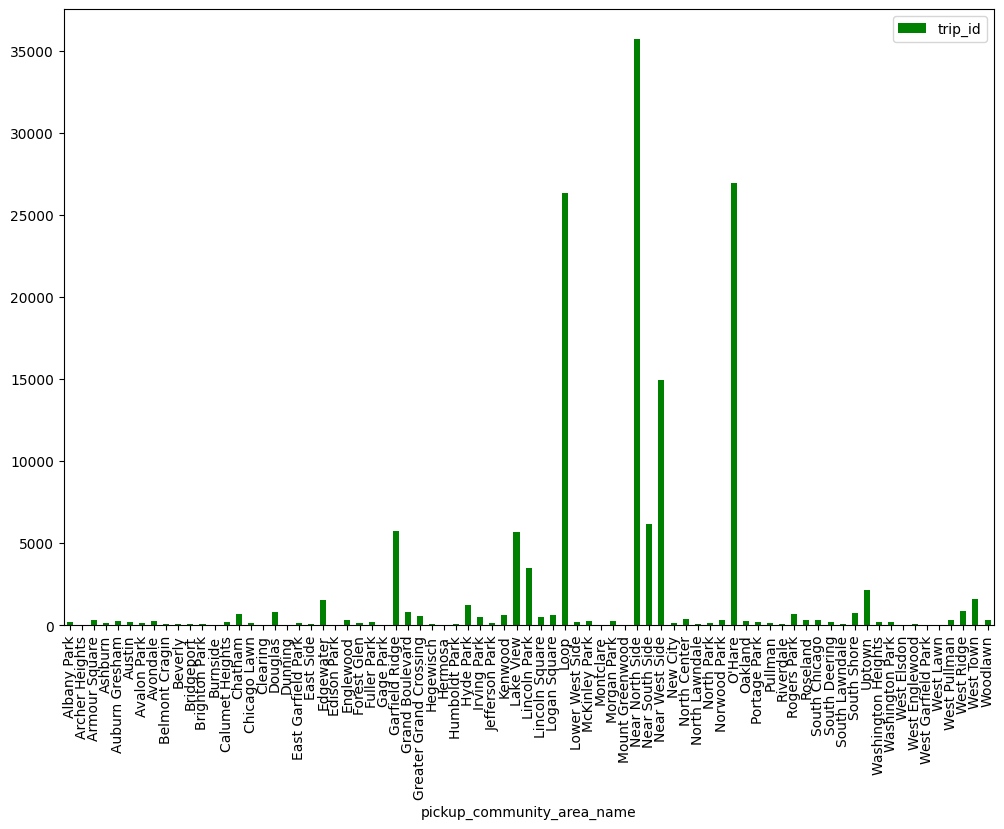

In [39]:
pivot_table = trips_full.pivot_table(values='trip_id', index='pickup_community_area_name', aggfunc='count')
pivot_table.plot(kind='bar', figsize=(12, 8), color='green')